## Past outcomes as possible predictions

https://pythonprogramming.net/past-pattern-outcomes-predictions/

In [1]:
'''
so we suspect that possibly 

To compare patterns:
use a % change calculation to calculate similarity between each %change
movement in the pattern finder. From those numbers, subtract them from 100, to
get a "how similar" #. From this point, take all 10 of the how similars,
and average them. Whichever pattern is MOST similar, is the one we will assume
we have found. 
'''

import time
import zipfile
import shutil
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from functools import reduce
from matplotlib import style
from IPython.display import display
from tqdm import tqdm
style.use("ggplot")

In [2]:
# unzip data
with zipfile.ZipFile('GBPUSD.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [3]:
df = pd.read_csv('data/GBPUSD1d.txt', header=None, names=['date', 'bid', 'ask'])
df["date"] = pd.to_datetime(df['date'], format='%Y%m%d%H%M%S')

In [4]:
# Limit the input size to prevent the program from running forever
df = df.iloc[0:37050].copy()

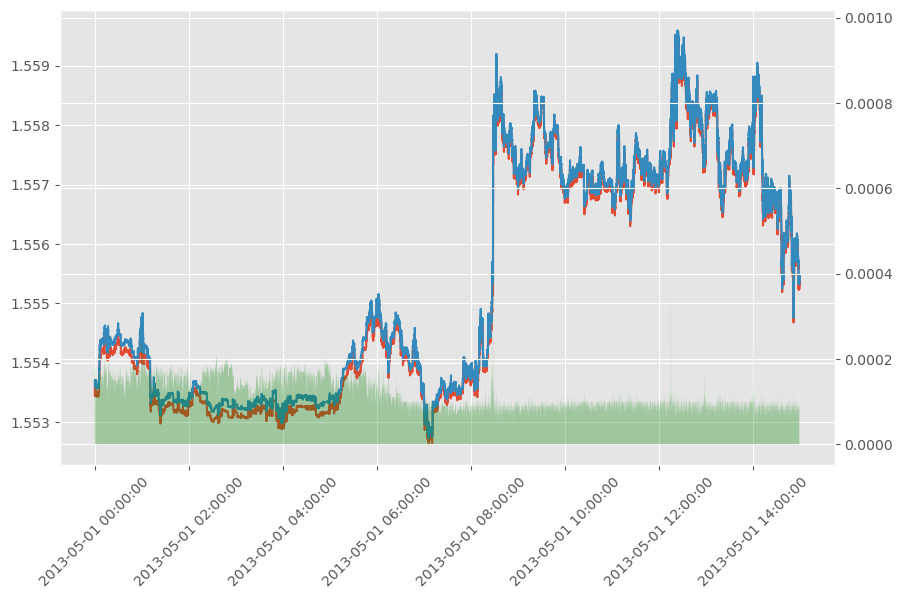

In [5]:
def graphRawFX():
    
    fig=plt.figure(figsize=(10,7))
    ax1 = plt.subplot2grid((40,40), (0,0), rowspan=40, colspan=40)
    ax1.plot(df.date, df.bid)
    ax1.plot(df.date, df.ask)
    
    # ax1.plot(df.date, percentChange(df.ask.iloc[0], df.ask),'r')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

    plt.grid(True)
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

    ax1_2 = ax1.twinx()
    
    ax1_2.fill_between(df.date, 0, (df.ask-df.bid), facecolor='g',alpha=.3)

    plt.subplots_adjust(bottom=.23)

    plt.show()

graphRawFX()

In [6]:
def percentChange(startPoint,currentPoint):
    try:
        x = ((float(currentPoint)-startPoint)/abs(startPoint))*100.00
        if x == 0.0:
            return 0.000000001
        else:
            return x
    except:
        return 0.0001

In [7]:
def patternStorage():
    '''
    The goal of patternFinder is to begin collection of %change patterns
    in the tick data. From there, we also collect the short-term outcome
    of this pattern. Later on, the length of the pattern, how far out we
    look to compare to, and the length of the compared range be changed,
    and even THAT can be machine learned to find the best of all 3 by
    comparing success rates.
    '''
    
    x = len(avgLine)-30
    y = 31
    currentStance = 'none'
    
    while y < x:
        pattern = []
        
        p1 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-29])
        p2 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-28])
        p3 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-27])
        p4 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-26])
        p5 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-25])
        p6 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-24])
        p7 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-23])
        p8 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-22])
        p9 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-21])
        p10= percentChange(avgLine.iloc[y-30], avgLine.iloc[y-20])

        p11 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-19])
        p12 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-18])
        p13 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-17])
        p14 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-16])
        p15 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-15])
        p16 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-14])
        p17 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-13])
        p18 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-12])
        p19 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-11])
        p20= percentChange(avgLine.iloc[y-30], avgLine.iloc[y-10])

        p21 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-9])
        p22 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-8])
        p23 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-7])
        p24 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-6])
        p25 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-5])
        p26 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-4])
        p27 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-3])
        p28 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-2])
        p29 = percentChange(avgLine.iloc[y-30], avgLine.iloc[y-1])
        p30= percentChange(avgLine.iloc[y-30], avgLine.iloc[y])
        
        outcomeRange = avgLine.iloc[y+20:y+30]
        currentPoint = avgLine.iloc[y]
        
        try:
            avgOutcome = reduce(lambda x, y: x + y, outcomeRange) / len(outcomeRange)
        except Exception as e:
            print(str(e))
            avgOutcome = 0
        futureOutcome = percentChange(currentPoint, avgOutcome)

        '''
        print 'where we are historically:',currentPoint
        print 'soft outcome of the horizon:',avgOutcome
        print 'This pattern brings a future change of:',futureOutcome
        print '_______'
        print p1, p2, p3, p4, p5, p6, p7, p8, p9, p10
        '''

        pattern.append(p1)
        pattern.append(p2)
        pattern.append(p3)
        pattern.append(p4)
        pattern.append(p5)
        pattern.append(p6)
        pattern.append(p7)
        pattern.append(p8)
        pattern.append(p9)
        pattern.append(p10)

        pattern.append(p11)
        pattern.append(p12)
        pattern.append(p13)
        pattern.append(p14)
        pattern.append(p15)
        pattern.append(p16)
        pattern.append(p17)
        pattern.append(p18)
        pattern.append(p19)
        pattern.append(p20)

        pattern.append(p21)
        pattern.append(p22)
        pattern.append(p23)
        pattern.append(p24)
        pattern.append(p25)
        pattern.append(p26)
        pattern.append(p27)
        pattern.append(p28)
        pattern.append(p29)
        pattern.append(p30)


        patternAr.append(pattern)
        performanceAr.append(futureOutcome)
        
        y+=1

    # print(f'patternAr len: {len(patternAr)}')
    # print(f'performanceAr len: {len(performanceAr)}')

In [8]:
def currentPattern():
    #mostRecentPoint = avgLine[-1]

    cp1 = percentChange(avgLine.iloc[-31],avgLine.iloc[-30])
    cp2 = percentChange(avgLine.iloc[-31],avgLine.iloc[-29])
    cp3 = percentChange(avgLine.iloc[-31],avgLine.iloc[-28])
    cp4 = percentChange(avgLine.iloc[-31],avgLine.iloc[-27])
    cp5 = percentChange(avgLine.iloc[-31],avgLine.iloc[-26])
    cp6 = percentChange(avgLine.iloc[-31],avgLine.iloc[-25])
    cp7 = percentChange(avgLine.iloc[-31],avgLine.iloc[-24])
    cp8 = percentChange(avgLine.iloc[-31],avgLine.iloc[-23])
    cp9 = percentChange(avgLine.iloc[-31],avgLine.iloc[-22])
    cp10= percentChange(avgLine.iloc[-31],avgLine.iloc[-21])

    cp11 = percentChange(avgLine.iloc[-31],avgLine.iloc[-20])
    cp12 = percentChange(avgLine.iloc[-31],avgLine.iloc[-19])
    cp13 = percentChange(avgLine.iloc[-31],avgLine.iloc[-18])
    cp14 = percentChange(avgLine.iloc[-31],avgLine.iloc[-17])
    cp15 = percentChange(avgLine.iloc[-31],avgLine.iloc[-16])
    cp16 = percentChange(avgLine.iloc[-31],avgLine.iloc[-15])
    cp17 = percentChange(avgLine.iloc[-31],avgLine.iloc[-14])
    cp18 = percentChange(avgLine.iloc[-31],avgLine.iloc[-13])
    cp19 = percentChange(avgLine.iloc[-31],avgLine.iloc[-12])
    cp20= percentChange(avgLine.iloc[-31],avgLine.iloc[-11])

    cp21 = percentChange(avgLine.iloc[-31],avgLine.iloc[-10])
    cp22 = percentChange(avgLine.iloc[-31],avgLine.iloc[-9])
    cp23 = percentChange(avgLine.iloc[-31],avgLine.iloc[-8])
    cp24 = percentChange(avgLine.iloc[-31],avgLine.iloc[-7])
    cp25 = percentChange(avgLine.iloc[-31],avgLine.iloc[-6])
    cp26 = percentChange(avgLine.iloc[-31],avgLine.iloc[-5])
    cp27 = percentChange(avgLine.iloc[-31],avgLine.iloc[-4])
    cp28 = percentChange(avgLine.iloc[-31],avgLine.iloc[-3])
    cp29 = percentChange(avgLine.iloc[-31],avgLine.iloc[-2])
    cp30= percentChange(avgLine.iloc[-31],avgLine.iloc[-1])

    patForRec.append(cp1)
    patForRec.append(cp2)
    patForRec.append(cp3)
    patForRec.append(cp4)
    patForRec.append(cp5)
    patForRec.append(cp6)
    patForRec.append(cp7)
    patForRec.append(cp8)
    patForRec.append(cp9)
    patForRec.append(cp10)
    patForRec.append(cp11)
    patForRec.append(cp12)
    patForRec.append(cp13)
    patForRec.append(cp14)
    patForRec.append(cp15)
    patForRec.append(cp16)
    patForRec.append(cp17)
    patForRec.append(cp18)
    patForRec.append(cp19)
    patForRec.append(cp20)
    patForRec.append(cp21)
    patForRec.append(cp22)
    patForRec.append(cp23)
    patForRec.append(cp24)
    patForRec.append(cp25)
    patForRec.append(cp26)
    patForRec.append(cp27)
    patForRec.append(cp28)
    patForRec.append(cp29)
    patForRec.append(cp30)

In [9]:
def patternRecognition():

    plotPatAr = []
    patFound = 0
    
    xp = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

    for eachPattern in patternAr:
        sim1 = 100.00 - abs(percentChange(eachPattern[0], patForRec[0]))
        sim2 = 100.00 - abs(percentChange(eachPattern[1], patForRec[1]))
        sim3 = 100.00 - abs(percentChange(eachPattern[2], patForRec[2]))
        sim4 = 100.00 - abs(percentChange(eachPattern[3], patForRec[3]))
        sim5 = 100.00 - abs(percentChange(eachPattern[4], patForRec[4]))
        sim6 = 100.00 - abs(percentChange(eachPattern[5], patForRec[5]))
        sim7 = 100.00 - abs(percentChange(eachPattern[6], patForRec[6]))
        sim8 = 100.00 - abs(percentChange(eachPattern[7], patForRec[7]))
        sim9 = 100.00 - abs(percentChange(eachPattern[8], patForRec[8]))
        sim10 = 100.00 - abs(percentChange(eachPattern[9], patForRec[9]))

        sim11 = 100.00 - abs(percentChange(eachPattern[10], patForRec[10]))
        sim12 = 100.00 - abs(percentChange(eachPattern[11], patForRec[11]))
        sim13 = 100.00 - abs(percentChange(eachPattern[12], patForRec[12]))
        sim14 = 100.00 - abs(percentChange(eachPattern[13], patForRec[13]))
        sim15 = 100.00 - abs(percentChange(eachPattern[14], patForRec[14]))
        sim16 = 100.00 - abs(percentChange(eachPattern[15], patForRec[15]))
        sim17 = 100.00 - abs(percentChange(eachPattern[16], patForRec[16]))
        sim18 = 100.00 - abs(percentChange(eachPattern[17], patForRec[17]))
        sim19 = 100.00 - abs(percentChange(eachPattern[18], patForRec[18]))
        sim20 = 100.00 - abs(percentChange(eachPattern[19], patForRec[19]))

        sim21 = 100.00 - abs(percentChange(eachPattern[20], patForRec[20]))
        sim22 = 100.00 - abs(percentChange(eachPattern[21], patForRec[21]))
        sim23 = 100.00 - abs(percentChange(eachPattern[22], patForRec[22]))
        sim24 = 100.00 - abs(percentChange(eachPattern[23], patForRec[23]))
        sim25 = 100.00 - abs(percentChange(eachPattern[24], patForRec[24]))
        sim26 = 100.00 - abs(percentChange(eachPattern[25], patForRec[25]))
        sim27 = 100.00 - abs(percentChange(eachPattern[26], patForRec[26]))
        sim28 = 100.00 - abs(percentChange(eachPattern[27], patForRec[27]))
        sim29 = 100.00 - abs(percentChange(eachPattern[28], patForRec[28]))
        sim30 = 100.00 - abs(percentChange(eachPattern[29], patForRec[29]))
        
        howSim = (sim1+sim2+sim3+sim4+sim5+sim6+sim7+sim8+sim9+sim10
                  +sim11+sim12+sim13+sim14+sim15+sim16+sim17+sim18+sim19+sim20
                  +sim21+sim22+sim23+sim24+sim25+sim26+sim27+sim28+sim29+sim30)/30.00

        if howSim > 75:
            patdex = patternAr.index(eachPattern)
            # print(f'({patdex})')
            patFound = 1
            
            plotPatAr.append(eachPattern)

            # fig = plt.figure()
            # plt.plot(xp, patForRec)
            # plt.plot(xp, eachPattern)
            # plt.show()
            
            # print(patForRec)
            # print('=' * 80)
            # print(eachPattern)
            # print('#' * 80)
            # print(f'predicted outcome: {performanceAr[patdex]}')
            # print('-' * 40)
            # print()

    if patFound == 1:
        fig = plt.figure(figsize=(10,6))
        
        for eachPatt in plotPatAr:
            futurePoints = patternAr.index(eachPatt)
            
            if performanceAr[futurePoints] > patForRec[29]:
                pcolor = '#24bc00'
            else:
                pcolor = '#d40000'
            
            plt.plot(xp, eachPatt)
            ####################
            plt.scatter(35, performanceAr[futurePoints],c=pcolor,alpha=.4)
        plt.plot(xp, patForRec, '#54fff7', linewidth = 3)
        plt.grid(True)
        plt.title('Pattern Recognition')
        plt.show()

In [10]:
dataLength = df.shape[0]
print(f'data length is: {dataLength}')

data length is: 37050


In [11]:
toWhat = 37000

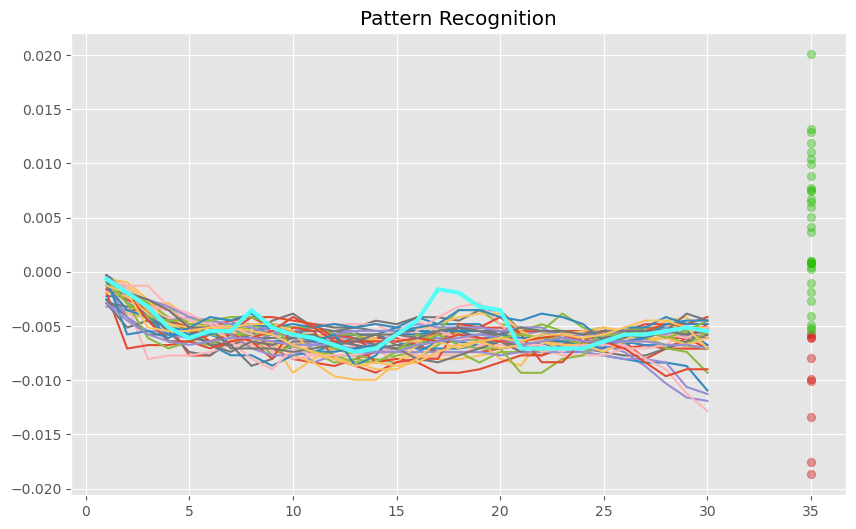

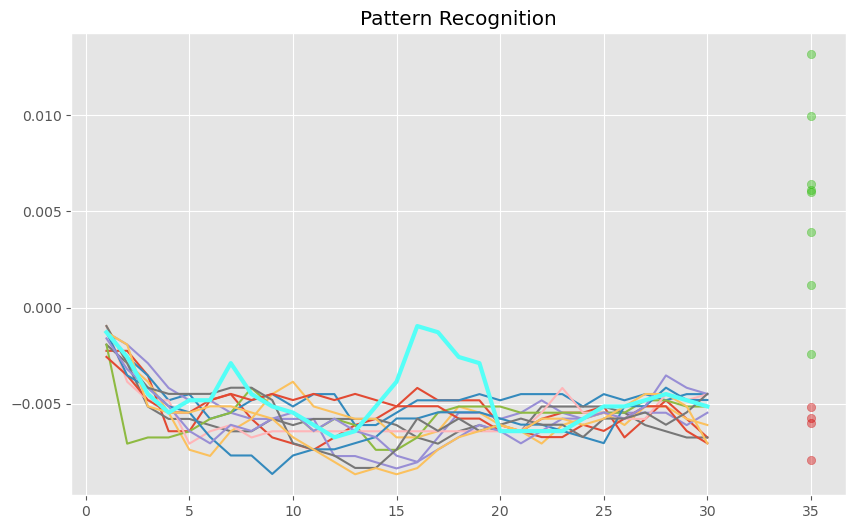

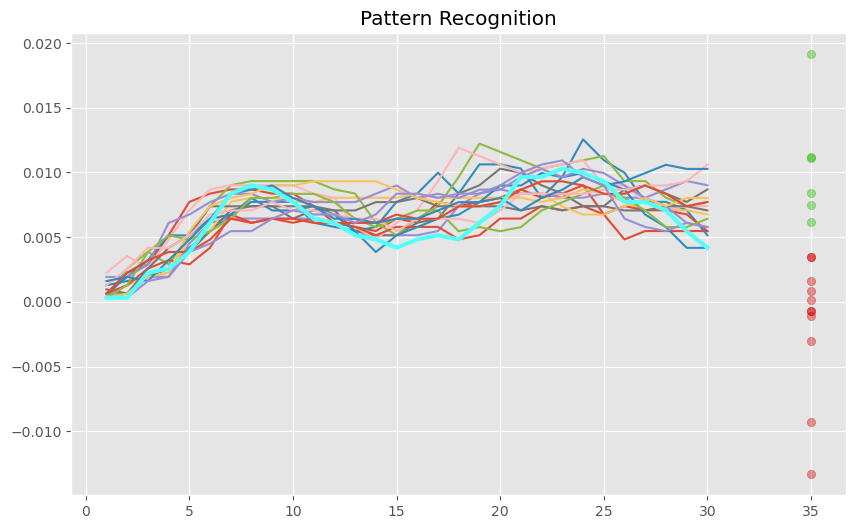

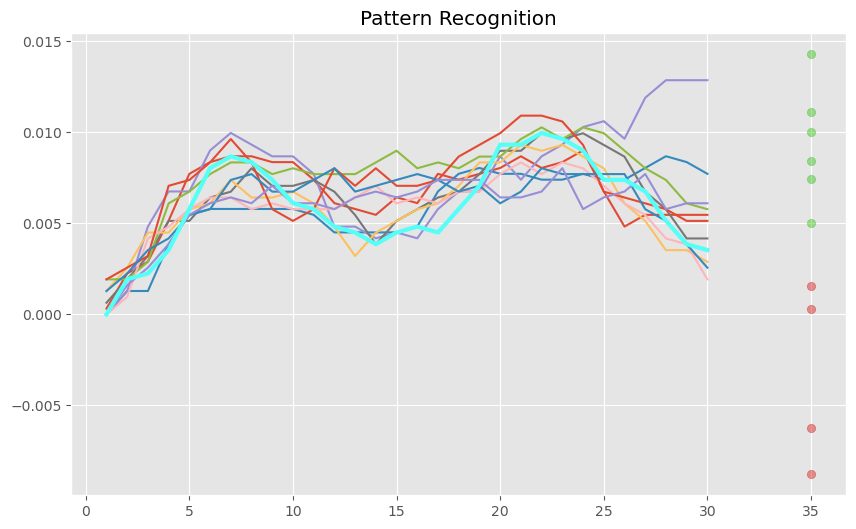

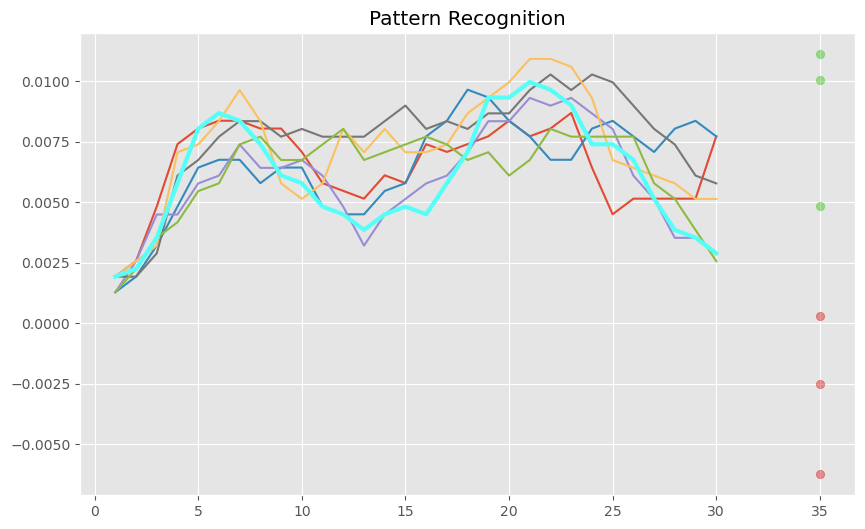

CPU times: user 3min 54s, sys: 1.08 s, total: 3min 55s
Wall time: 3min 52s


In [12]:
%%time

for to in range(toWhat, dataLength):
    avgLine = ((df.bid+df.ask)/2)
    avgLine = avgLine[:to]

    patternAr = []
    performanceAr = []
    patForRec = []

    patternStorage()
    currentPattern()
    patternRecognition()
    
    # moveOn = input('press ENTER to continue...')

### Optimize with Vectorized Operations:

In [13]:
PATTERN_POINTS = 30
MIN_SCORE = 75

In [14]:
def percentChange2(startPoint, currentPoint):
    change = np.where(startPoint != 0, ((currentPoint - startPoint) / abs(startPoint)) * 100.00, 0.0001)
    change = np.where(change != 0, change, 0.000000001)
    return pd.Series(change, index=startPoint.index)

In [15]:
def patternStorage2(avgLine: pd.Series) -> pd.DataFrame:
    '''
    The goal of patternFinder is to begin collection of %change patterns
    in the tick data. From there, we also collect the short-term outcome
    of this pattern. Later on, the length of the pattern, how far out we
    look to compare to, and the length of the compared range be changed,
    and even THAT can be machine learned to find the best of all 3 by
    comparing success rates.
    '''
    
    avgData = pd.DataFrame(avgLine, columns=['current'])
    
    # prepare prev 1~30 days price for calculating percent change
    for i in range(1, 31):
        avgData[f'prev{i}'] = avgData['current'].shift(i)
    
    x = len(avgLine)-30
    y = 31
    currentStance = 'none'
    
    patterns = pd.DataFrame(avgData['current'])
    
    #function to account for the average of the items in the array
    avgOutcome = patterns['current'].rolling(window=10).mean().shift(-29)
    patterns['predicted'] = percentChange2(patterns['current'], avgOutcome)
    
    for i in range(1, PATTERN_POINTS + 1):
        if i == PATTERN_POINTS:
            patterns[f'p{i}'] = percentChange2(avgData[f'prev{PATTERN_POINTS}'], avgData['current'])
        else:
            patterns[f'p{i}'] = percentChange2(avgData[f'prev{PATTERN_POINTS}'], avgData[f'prev{PATTERN_POINTS-i}'])
    
    patterns = patterns.iloc[31:-30].copy()
    patterns.reset_index(inplace=True, drop=True)
    
    return patterns

In [16]:
def patternRecognition2(patterns: pd.DataFrame, patForRec: list) -> pd.DataFrame:
    recognitions = patterns.copy()
    sims = []
    for i in range(0, PATTERN_POINTS):
        sims.append(100.00 - abs(percentChange2(recognitions[f'p{i+1}'], patForRec[i])))
    
    recognitions['score'] = pd.concat(sims, axis=1).mean(axis=1)
    
    return recognitions[recognitions['score'] > MIN_SCORE].copy()

In [17]:
toWhat = 37000

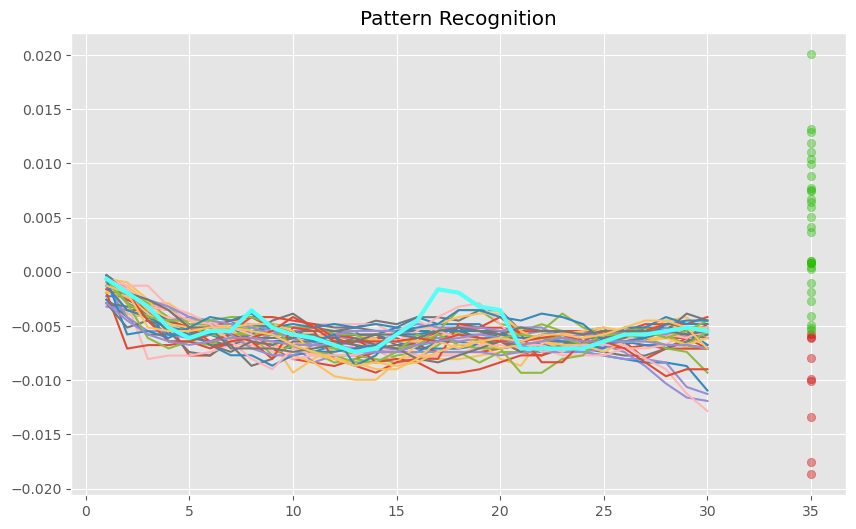

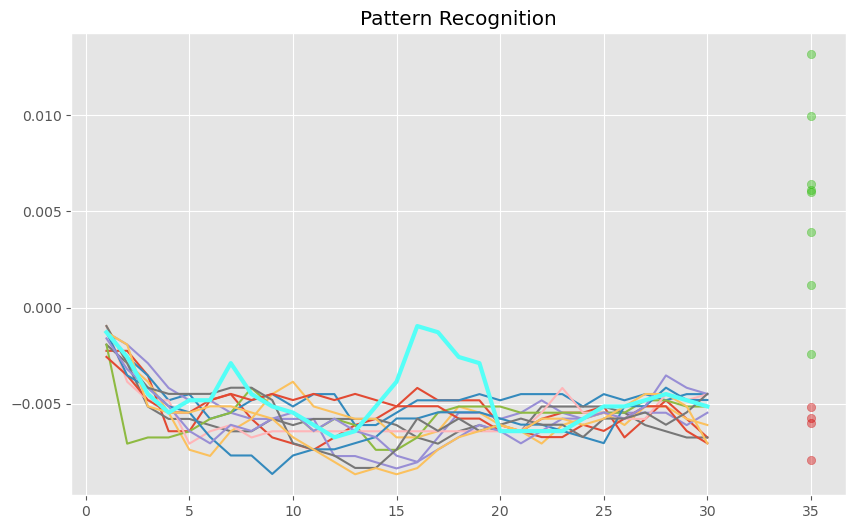

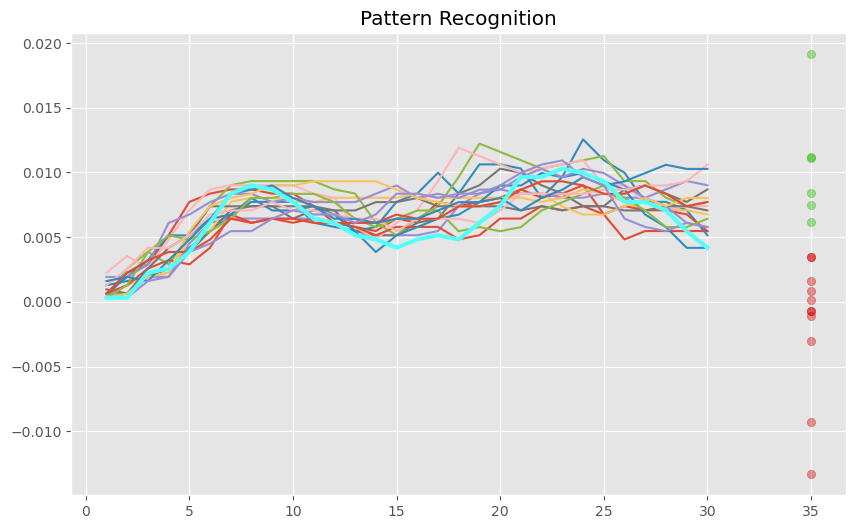

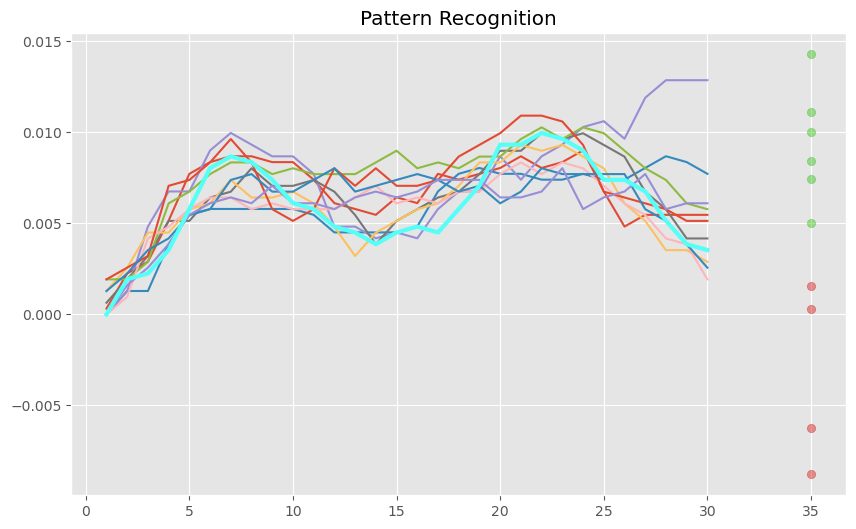

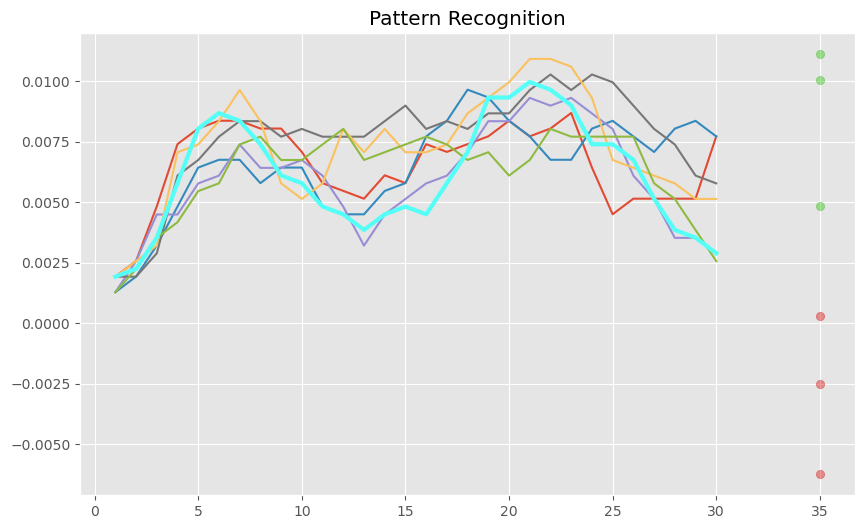

CPU times: user 3.59 s, sys: 311 ms, total: 3.9 s
Wall time: 2.03 s


In [18]:
%%time

for to in range(toWhat, dataLength):
    avgLine = ((df.bid+df.ask)/2)
    avgLine = avgLine[:to]
    
    patterns = patternStorage2(avgLine)
    patForRec = []
    currentPattern()
    recognitions = patternRecognition2(patterns, patForRec)
    
    if recognitions.shape[0] > 0:
        fig = plt.figure(figsize=(10,6))
        
        for idx, row in recognitions.iterrows():
            if row['predicted'] > patForRec[PATTERN_POINTS-1]:
                pcolor = '#24bc00'
            else:
                pcolor = '#d40000'
            plt.scatter(PATTERN_POINTS+5, row['predicted'],c=pcolor,alpha=.4)
        
        xp = [i+1 for i in range(0, PATTERN_POINTS)]
        plt.plot(xp, recognitions.T.loc['p1':f'p{PATTERN_POINTS}'])
        plt.plot(xp, patForRec, '#54fff7', linewidth = 3)
        plt.grid(True)
        plt.title('Pattern Recognition')
        plt.show()

In [19]:
# remove extracted data
shutil.rmtree('data')